In [3]:
import os
import numpy as np
import cv2
import json
from pathlib import Path
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from torchvision.utils import make_grid
import pickle

In [83]:
from matplotlib.pyplot import imshow, figure
import matplotlib as mpl

def view_image(ii, dpi=100, nrow=4):
    mpl.rcParams['figure.dpi'] = dpi
    if len(ii.shape) == 3:        
        imshow(ii)
        return
    t = torch.from_numpy(ii)
    t = t.permute(0, 3, 1, 2)
    n = make_grid(t,padding=4,pad_value=1, nrow=nrow)
    imshow(n.numpy().transpose(1,2,0))

def img_and_mask(data, center=True):
    img = np.expand_dims(data['image'], axis=0)
    mask = data['mask']
    ann = data['objects']
    imgs = np.concatenate([img,mask])
    ii = imgs.copy()
    if center:
        for a in ann:
            x = a['pixel_coords'][0]
            y = a['pixel_coords'][1]
            for i in ii:
                i = cv2.circle(i, (x, y), 2, (255,0,0), 4)
    return ii
    
def view_img_and_mask(data, center=True, dpi=100,nrow=2):
    imgs = img_and_mask(data, center)
    view_image(imgs, dpi, nrow)
        
def view_all(data, center=True, dpi=100, nrow=2):        
    imgs = []
    topview = img_and_mask(data['topview'],center)
    imgs.append(topview)
    for d in data['views']:
        imgs.append(img_and_mask(d, center))
    imgs = np.concatenate(imgs)
    view_image(imgs, dpi,nrow)
    

rootpath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/output')


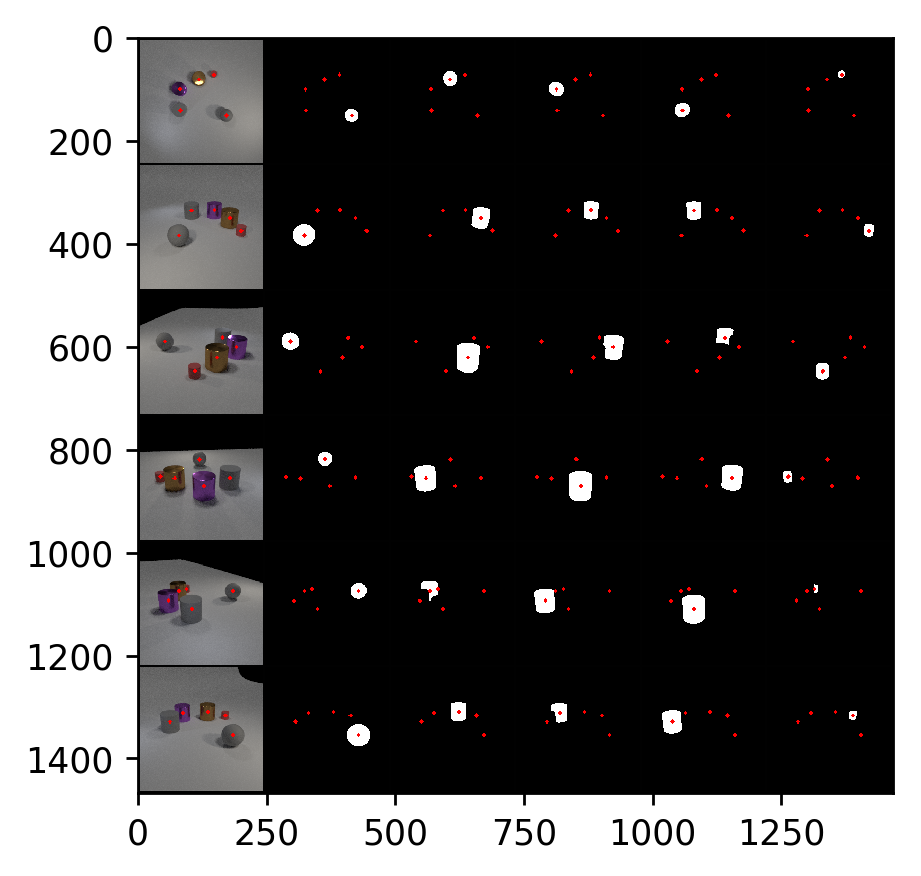

In [92]:
idx = 0
datapath = rootpath / '{}.pkl'.format(idx)
with open(datapath, 'rb') as f:
    scene = pickle.load(f)
view_all(scene, True, dpi=250,nrow=6)